<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br /></td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 3</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

## 0. Erinnerung letzte Woche

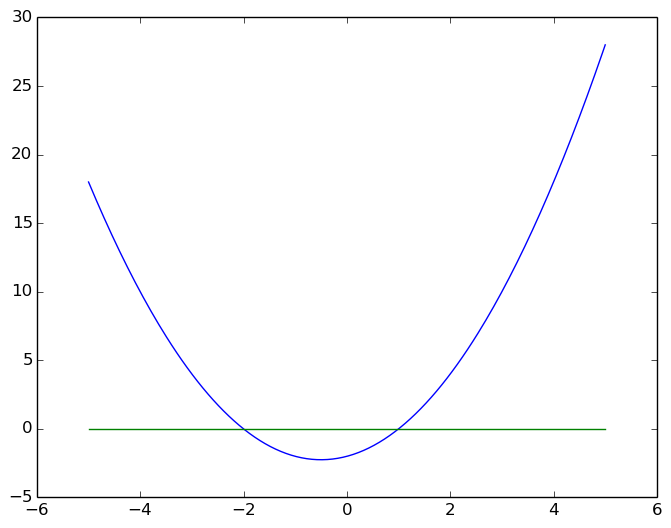

In [3]:
f(x) = x.^2+x-2;

x_values = linspace(-5,5,200);
f_values = f(x_values);

using PyPlot
plot(x_values, f_values);
plot(x_values, zeros(200));

### Funktionen

In [4]:
function multiply(a,b)
    return a*b
end

multiply (generic function with 1 method)

In [5]:
multiply(3.0, 8.5)

25.5

In [11]:
function foo(a=1,b=0)
    println(a)
    println(b)
end

foo (generic function with 3 methods)

In [13]:
foo()

1
0


### Schleifen

In [19]:
for i in 1:2:5
    println(i)
end

1
3
5


In [15]:
for i in 5:1
    println(i)
end

In [18]:
for i in 5:-1:1
    println(i)
end

5
4
3
2
1


In [20]:
for i in reverse(1:5)
    println(i)
end

5
4
3
2
1


## 1. Typen

Wie Variablen im Speicher abgelegt, d.h. wie sie in Nullen und Einsen kodiert werden, ist durch ihren Typ bestimmt. Julia ist eine sogenannte <b>dynamisch typisierte Sprache</b>, was bedeutet, dass die Variablen ihren Typ dynamisch je nach Kontext verändern können. Bei der Ausführung des Codes muss jedoch ein Typ festgelegt werden, weshalb Julia schon früh versucht den richtigen Typ zu bestimmen, was durch die Art der Initialisierung beeinflusst und im folgenden mit dem Befehl *typeof* herausgefunden werden kann.

In [21]:
a=5

5

In [22]:
println(typeof(a))

Int64


In [23]:
b=5.0
println(typeof(b))

Float64


In [24]:
c="5"
println(typeof(c))

ASCIIString


In [25]:
d="β"
println(typeof(d))

UTF8String


Der Typ kann je nach Bedarf verändert werden. Dies ergibt sich entweder aus dem Kontext, wenn zum Beispiel eine natürliche Zahl durch eine andere dividiert wird und sich so eine Gleitkommazahl als Resultat ergibt, oder kann explizit mit der Funktion *convert* veranlasst werden (auch als *type casting* bezeichnet):

In [32]:
a=4
b=2
c=a/b
println(typeof(a))
println(typeof(b))
println(typeof(c))

Int64
Int64
Float64


In [33]:
WORD_SIZE

64

Auch schon bei der Initialisierung ist es möglich den Typ eines Objekts festzulegen, was oft sinnvoll ist, um die Fehleranfälligkeit eines Programms zu verringern. Ein Array, das heißt eine Menge an Objekten, hat erst einmal den Datentyp *Any*, was bedeutet, dass man alle Typen darin speichern kann:

In [39]:
a = [ ]
push!(a,4)
push!(a,5.0)
push!(a,"hello")
println(typeof(a))


Array{Any,1}


Initialisieren wir aber den Array mit einem bestimmten Datentyp, so erhalten wir eine Fehlermeldung, wenn wir einen abweichenden Datentyp in den Array speichern wollen:

In [47]:
a = Int64[]
push!(a, 4)
push!(a, 5.00001)

LoadError: LoadError: InexactError()
while loading In[47], in expression starting on line 3

### Floating Point Numbers (cont'd)

In [51]:
eps(Float64)

2.220446049250313e-16

### Overflow 

In [52]:
x=typemax(Int8)

127

In [53]:
2^7-1

127

In [59]:
x=typemax(Int64)

9223372036854775807

In [55]:
2^63-1

9223372036854775807

In [60]:
x=x+1

-9223372036854775799

## 2. Collection types, arrays

In [61]:
b=[1,2,4,9,5,3,100]

7-element Array{Int64,1}:
   1
   2
   4
   9
   5
   3
 100

In [62]:
shift!(b)

1

In [63]:
shift!(b)

2

In [64]:
b

5-element Array{Int64,1}:
   4
   9
   5
   3
 100

In [65]:
shift!(b)

4

In [66]:
unshift!(b,42)

5-element Array{Int64,1}:
  42
   9
   5
   3
 100

In [67]:
sort(b)

5-element Array{Int64,1}:
   3
   5
   9
  42
 100

In [68]:
b

5-element Array{Int64,1}:
  42
   9
   5
   3
 100

In [69]:
sort!(b)

5-element Array{Int64,1}:
   3
   5
   9
  42
 100

In [70]:
b

5-element Array{Int64,1}:
   3
   5
   9
  42
 100

In [72]:
shift!(b)

3

In [73]:
b

4-element Array{Int64,1}:
   5
   9
  42
 100

### Swap Funktion

In [78]:
function swap(a, i, j)
    tmp = a[i]
    a[i] = a[j]
    a[j] = tmp
    return a
end

swap (generic function with 1 method)

In [79]:
b

4-element Array{Int64,1}:
   9
   5
  42
 100

In [80]:
swap(b,1,2)

4-element Array{Int64,1}:
   5
   9
  42
 100

In [81]:
swap(b,3,4)

4-element Array{Int64,1}:
   5
   9
 100
  42

## 3. Sortier-Alogorithmen

### Bubble-Sort

In [83]:
function bubblesort(a)
    for rechts = length(a):-1:2
        # bubble-Schritt
        for i in 1:rechts-1
            if a[i]>a[i+1]
                a = swap(a, i, i+1)
            end
        end
    end
    return a
end

bubblesort (generic function with 1 method)

In [88]:
b = rand(10)

10-element Array{Float64,1}:
 0.176976
 0.662994
 0.395545
 0.170894
 0.20967 
 0.343363
 0.633401
 0.224846
 0.166643
 0.824843

In [89]:
bubblesort(b)

10-element Array{Float64,1}:
 0.166643
 0.170894
 0.176976
 0.20967 
 0.224846
 0.343363
 0.395545
 0.633401
 0.662994
 0.824843

### Timing und Komplexität

In [96]:
b=rand(50000);
@time bubblesort(b);

  6.501231 seconds (4 allocations: 160 bytes)


In [99]:
number_count = [0.0]
elapsed_time = [0.0]

for i in 1:15
    b=rand(2^i)
    t1 = time()
    bubblesort(b)
    t2 = time()
    println(2^i, "\t", t2-t1)
    push!(number_count, 2^i)
    push!(elapsed_time, t2-t1)
end

2	9.5367431640625e-7
4	9.5367431640625e-7
8	0.0
16	1.9073486328125e-6
32	4.0531158447265625e-6
64	1.0013580322265625e-5
128	3.504753112792969e-5
256	0.00011682510375976562
512	0.0004220008850097656
1024	0.001486063003540039
2048	0.006108999252319336
4096	0.028062105178833008
8192	0.14147400856018066
16384	0.6539509296417236
32768	2.766364812850952


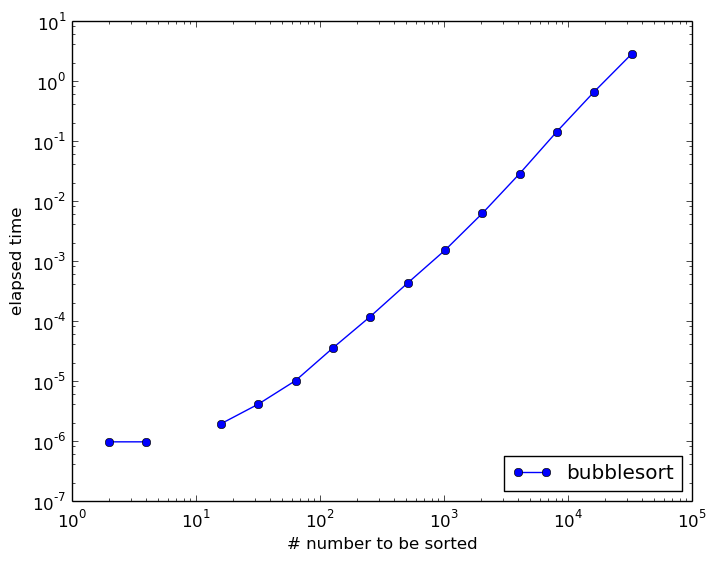

PyObject <matplotlib.text.Text object at 0x7fc4a2f9a290>

In [102]:
using PyPlot
loglog(number_count, elapsed_time, marker="o", label="bubblesort");
legend(loc=4);
xlabel("# number to be sorted");
ylabel("elapsed time");